# DAEN 690 Capstone Project

## Import Libraries

In [1]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns

## Importing Dataset, Creating DataFrame, and Standardizing Data

### Upton, NY Dataset

In [2]:
#load Upton, NY Dataset
df = pd.read_csv("USM00072501-data.txt", sep = '\t', header = None)

In [3]:
df

,0
0,#USM00072501 1994 09 03 00 2314 166 ncdc6301 ...
1,21 0 102470B 20 190B 400 140 310 ...
2,20 12 101800B 76B 187B 425 131 315 ...
3,10 48 100000 229B 181B 347 159 327 ...
4,10 324 92500 888B 119B 449 116 339 ...
...,...
3677381,20 9650 787 31915B -557A 31 238 271 ...
3677382,20 9705 776 32006B -551A 31 239 270 ...
3677383,20 9722 763 32112B -548A 32 238 263 ...
3677384,10 9849 700 32667B -555A 34 232 254 ...


In [4]:
#Assigning columns
id_ = []
year = []
month = []
day = []
hour =[]
reltime = []
numlev = []
p_src = []
np_src = []
lat = []
lon = []

lvltyp1 = []
lvltyp2 = []
etime = []
press = []
pflag = []
gph = []
zflag = []
temp = []
tflag = []
rh = []
dpdp = []
wdir = []
wspd = []

for line in df[0]:
    if "USM00072501" in line:
        id_.append(line[0:12].strip())
        year.append(line[13:17].strip())
        month.append(line[18:20].strip())
        day.append(line[21:23])
        hour.append(line[24:26])
        reltime.append(line[27:31])
        numlev.append(line[33:36])
        p_src.append(line[37:45])
        np_src.append(line[46:54])
        lat.append(line[56:62])
        lon.append(line[64:71])
        lvltyp1.append(None)
        lvltyp2.append(None)
        etime.append(None)
        press.append(None)
        pflag.append(None)
        gph.append(None)
        zflag.append(None)
        temp.append(None)
        tflag.append(None)
        rh.append(None)
        dpdp.append(None)
        wdir.append(None)
        wspd.append(None)
    else:
        id_.append(None)
        year.append(None)
        month.append(None)
        day.append(None)
        hour.append(None)
        reltime.append(None)
        numlev.append(None)
        p_src.append(None)
        np_src.append(None)
        lat.append(None)
        lon.append(None)
        lvltyp1.append(line[0:1].strip())
        lvltyp2.append(line[1:2].strip())
        etime.append(line[4:8].strip())
        press.append(line[9:15].strip())
        pflag.append(line[15:16].strip())
        gph.append(line[17:21].strip())
        zflag.append(line[21:22].strip())
        temp.append(line[22:27].strip())
        tflag.append(line[27:28].strip())
        rh.append(line[28:33].strip())
        dpdp.append(line[35:39].strip())
        wdir.append(line[41:45].strip())
        wspd.append(line[47:51].strip())

In [5]:
#Creating DataFrame
upton_df = pd.DataFrame({
    'id_': id_,
    'year': year,
    'month': month,
    'day': day,
    'hour': hour,
    'reltime': reltime,
    'numlev': numlev,
    'p_src': p_src,
    'np_src': np_src,
    'lat': lat,
    'lon': lon,
    'lvltyp1': lvltyp1,
    'lvltyp2': lvltyp2,
    'etime': etime,
    'press': press,
    'pflag': pflag,
    'gph': gph,
    'zflag': zflag,
    'temp': temp,
    'tflag': tflag,
    'rh': rh,
    'dpdp': dpdp,
    'wdir': wdir,
    'wspd': wspd})

In [6]:
#Combining Headers with variables
upton_df['id_'].fillna(method = 'ffill', inplace = True)
upton_df['year'].fillna(method = 'ffill', inplace = True)
upton_df['month'].fillna(method = 'ffill', inplace = True)
upton_df['day'].fillna(method = 'ffill', inplace = True)
upton_df['hour'].fillna(method = 'ffill', inplace = True)
upton_df['reltime'].fillna(method = 'ffill', inplace = True)
upton_df['numlev'].fillna(method = 'ffill', inplace = True)
upton_df['p_src'].fillna(method = 'ffill', inplace = True)
upton_df['np_src'].fillna(method = 'ffill', inplace = True)
upton_df['lat'].fillna(method = 'ffill', inplace = True)
upton_df['lon'].fillna(method = 'ffill', inplace = True)

In [7]:
#Drop rows with null values
upton_df = upton_df.dropna()

In [8]:
#us_df data types
print(upton_df.dtypes)

id_        object
year       object
month      object
day        object
hour       object
reltime    object
numlev     object
p_src      object
np_src     object
lat        object
lon        object
lvltyp1    object
lvltyp2    object
etime      object
press      object
pflag      object
gph        object
zflag      object
temp       object
tflag      object
rh         object
dpdp       object
wdir       object
wspd       object
dtype: object


In [9]:
#Convert headers to the correct data type
upton_df['id_'] = upton_df['id_'].astype(str)
upton_df['year'] = upton_df['year'].astype(int)
upton_df['month'] = upton_df['month'].astype(int)
upton_df['day'] = upton_df['day'].astype(int)
upton_df['hour'] = upton_df['hour'].astype(int)
upton_df['reltime'] = upton_df['reltime'].astype(int)
upton_df['numlev'] = upton_df['numlev'].astype(int)
upton_df['p_src'] = upton_df['p_src'].astype(str)
upton_df['np_src'] = upton_df['np_src'].astype(str)
upton_df['lat'] = upton_df['lat'].astype(int)
upton_df['lon'] = upton_df['lon'].astype(int)

#Convert data records to the correct data type
upton_df['lvltyp1'] = upton_df['lvltyp1'].astype(int)
upton_df['lvltyp2'] = upton_df['lvltyp2'].astype(int)
upton_df['etime'] = upton_df['etime'].astype(int)
upton_df['press'] = upton_df['press'].astype(int)
upton_df['pflag'] = upton_df['pflag'].astype(str)
upton_df['gph'] = upton_df['gph'].astype(int)
upton_df['zflag'] = upton_df['zflag'].astype(str)
upton_df['temp'] = upton_df['temp'].astype(int)
upton_df['tflag'] = upton_df['tflag'].astype(str)
upton_df['rh'] = upton_df['rh'].astype(int)
upton_df['dpdp'] = upton_df['dpdp'].astype(int)
upton_df['wdir'] = upton_df['wdir'].astype(int)
upton_df['wspd'] = upton_df['wspd'].astype(int)


In [10]:
upton_df

,id_,year,month,day,hour,reltime,numlev,p_src,np_src,lat,...,press,pflag,gph,zflag,temp,tflag,rh,dpdp,wdir,wspd
1,#USM00072501,1994,9,3,0,2314,166,ncdc6301,ncdc6301,408650,...,102470,B,20,,190,B,400,140,310,26
2,#USM00072501,1994,9,3,0,2314,166,ncdc6301,ncdc6301,408650,...,101800,B,76,B,187,B,425,131,315,31
3,#USM00072501,1994,9,3,0,2314,166,ncdc6301,ncdc6301,408650,...,100000,,229,B,181,B,347,159,327,50
4,#USM00072501,1994,9,3,0,2314,166,ncdc6301,ncdc6301,408650,...,92500,,888,B,119,B,449,116,339,67
5,#USM00072501,1994,9,3,0,2314,166,ncdc6301,ncdc6301,408650,...,90270,,1092,B,100,B,490,103,341,62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3677381,#USM00072501,2024,2,15,12,1107,128,ncdc-nws,,408650,...,787,,1915,B,-557,A,31,238,271,300
3677382,#USM00072501,2024,2,15,12,1107,128,ncdc-nws,,408650,...,776,,2006,B,-551,A,31,239,270,277
3677383,#USM00072501,2024,2,15,12,1107,128,ncdc-nws,,408650,...,763,,2112,B,-548,A,32,238,263,286
3677384,#USM00072501,2024,2,15,12,1107,128,ncdc-nws,,408650,...,700,,2667,B,-555,A,34,232,254,377


### Albany, NY Dataset

In [11]:
#Loading Albany, NY Dataset
df2 = pd.read_csv("USM00072518-data.txt", sep = '\t', header = None)

In [12]:
df2

,0
0,#USM00072518 1930 01 13 99 2030 6 ...
1,31 -9999 -9999 84 -9999 -9999 -9999 338 ...
2,30 -9999 -9999 250 -9999 -9999 -9999 0 ...
3,30 -9999 -9999 500 -9999 -9999 -9999 45 ...
4,30 -9999 -9999 750 -9999 -9999 -9999 68 ...
...,...
4743858,20 9325 1083 29913B -589B 43 211 271 ...
4743859,20 9404 1034 30202B -600B 48 203 284 ...
4743860,20 9425 1010 30350B -605B 47 204 285 ...
4743861,10 9434 1000 30410B -606B 45 206 283 ...


In [13]:
#Assigning columns
id_2 = []
year2 = []
month2 = []
day2 = []
hour2 =[]
reltime2 = []
numlev2 = []
p_src2 = []
np_src2 = []
lat2 = []
lon2 = []

lvltyp12 = []
lvltyp22 = []
etime2 = []
press2 = []
pflag2 = []
gph2 = []
zflag2 = []
temp2 = []
tflag2 = []
rh2 = []
dpdp2 = []
wdir2 = []
wspd2 = []

for line in df2[0]:
    if "USM00072518" in line:
        id_2.append(line[0:12].strip())
        year2.append(line[13:17].strip())
        month2.append(line[18:20].strip())
        day2.append(line[21:23])
        hour2.append(line[24:26])
        reltime2.append(line[27:31])
        numlev2.append(line[33:36])
        p_src2.append(line[37:45])
        np_src2.append(line[46:54])
        lat2.append(line[56:62])
        lon2.append(line[64:71])
        lvltyp12.append(None)
        lvltyp22.append(None)
        etime2.append(None)
        press2.append(None)
        pflag2.append(None)
        gph2.append(None)
        zflag2.append(None)
        temp2.append(None)
        tflag2.append(None)
        rh2.append(None)
        dpdp2.append(None)
        wdir2.append(None)
        wspd2.append(None)
    else:
        id_2.append(None)
        year2.append(None)
        month2.append(None)
        day2.append(None)
        hour2.append(None)
        reltime2.append(None)
        numlev2.append(None)
        p_src2.append(None)
        np_src2.append(None)
        lat2.append(None)
        lon2.append(None)
        lvltyp12.append(line[0:1].strip())
        lvltyp22.append(line[1:2].strip())
        etime2.append(line[4:8].strip())
        press2.append(line[9:15].strip())
        pflag2.append(line[15:16].strip())
        gph2.append(line[17:21].strip())
        zflag2.append(line[21:22].strip())
        temp2.append(line[22:27].strip())
        tflag2.append(line[27:28].strip())
        rh2.append(line[28:33].strip())
        dpdp2.append(line[35:39].strip())
        wdir2.append(line[41:45].strip())
        wspd2.append(line[47:51].strip())

In [14]:
#Creating DataFrame
albany_df = pd.DataFrame({
    'id_': id_2,
    'year': year2,
    'month': month2,
    'day': day2,
    'hour': hour2,
    'reltime': reltime2,
    'numlev': numlev2,
    'p_src': p_src2,
    'np_src': np_src2,
    'lat': lat2,
    'lon': lon2,
    'lvltyp1': lvltyp12,
    'lvltyp2': lvltyp22,
    'etime': etime2,
    'press': press2,
    'pflag': pflag2,
    'gph': gph2,
    'zflag': zflag2,
    'temp': temp2,
    'tflag': tflag2,
    'rh': rh2,
    'dpdp': dpdp2,
    'wdir': wdir2,
    'wspd': wspd2})

In [15]:
#Combining Headers with variables
albany_df['id_'].fillna(method = 'ffill', inplace = True)
albany_df['year'].fillna(method = 'ffill', inplace = True)
albany_df['month'].fillna(method = 'ffill', inplace = True)
albany_df['day'].fillna(method = 'ffill', inplace = True)
albany_df['hour'].fillna(method = 'ffill', inplace = True)
albany_df['reltime'].fillna(method = 'ffill', inplace = True)
albany_df['numlev'].fillna(method = 'ffill', inplace = True)
albany_df['p_src'].fillna(method = 'ffill', inplace = True)
albany_df['np_src'].fillna(method = 'ffill', inplace = True)
albany_df['lat'].fillna(method = 'ffill', inplace = True)
albany_df['lon'].fillna(method = 'ffill', inplace = True)

In [16]:
#Drop rows with null values
albany_df = albany_df.dropna()

In [17]:
#Convert headers to the correct data type
albany_df['id_'] = albany_df['id_'].astype(str)
albany_df['year'] = albany_df['year'].astype(int)
albany_df['month'] = albany_df['month'].astype(int)
albany_df['day'] = albany_df['day'].astype(int)
albany_df['hour'] = albany_df['hour'].astype(int)
albany_df['reltime'] = albany_df['reltime'].astype(int)
albany_df['numlev'] = albany_df['numlev'].astype(int)
albany_df['p_src'] = albany_df['p_src'].astype(str)
albany_df['np_src'] = albany_df['np_src'].astype(str)
albany_df['lat'] = albany_df['lat'].astype(int)
albany_df['lon'] = albany_df['lon'].astype(int)

#Convert data records to the correct data type
albany_df['lvltyp1'] = albany_df['lvltyp1'].astype(int)
albany_df['lvltyp2'] = albany_df['lvltyp2'].astype(int)
albany_df['etime'] = albany_df['etime'].astype(int)
albany_df['press'] = albany_df['press'].astype(int)
albany_df['pflag'] = albany_df['pflag'].astype(str)
albany_df['gph'] = albany_df['gph'].astype(int)
albany_df['zflag'] = albany_df['zflag'].astype(str)
albany_df['temp'] = albany_df['temp'].astype(int)
albany_df['tflag'] = albany_df['tflag'].astype(str)
albany_df['rh'] = albany_df['rh'].astype(int)
albany_df['dpdp'] = albany_df['dpdp'].astype(int)
albany_df['wdir'] = albany_df['wdir'].astype(int)
albany_df['wspd'] = albany_df['wspd'].astype(int)

In [18]:
albany_df

,id_,year,month,day,hour,reltime,numlev,p_src,np_src,lat,...,press,pflag,gph,zflag,temp,tflag,rh,dpdp,wdir,wspd
1,#USM00072518,1930,1,13,99,2030,6,,cdmp-usm,426919,...,-9999,,84,,-9999,,-9999,9999,338,20
2,#USM00072518,1930,1,13,99,2030,6,,cdmp-usm,426919,...,-9999,,250,,-9999,,-9999,9999,0,30
3,#USM00072518,1930,1,13,99,2030,6,,cdmp-usm,426919,...,-9999,,500,,-9999,,-9999,9999,45,20
4,#USM00072518,1930,1,13,99,2030,6,,cdmp-usm,426919,...,-9999,,750,,-9999,,-9999,9999,68,20
5,#USM00072518,1930,1,13,99,2030,6,,cdmp-usm,426919,...,-9999,,1000,,-9999,,-9999,9999,45,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4743858,#USM00072518,2024,2,15,12,1107,249,ncdc-nws,,426919,...,1083,,9913,B,-589,B,43,211,271,136
4743859,#USM00072518,2024,2,15,12,1107,249,ncdc-nws,,426919,...,1034,,202,B,-600,B,48,203,284,172
4743860,#USM00072518,2024,2,15,12,1107,249,ncdc-nws,,426919,...,1010,,350,B,-605,B,47,204,285,195
4743861,#USM00072518,2024,2,15,12,1107,249,ncdc-nws,,426919,...,1000,,410,B,-606,B,45,206,283,204


## Preprocessing

## Functions

### Temperature converts to Fahrenheit

In [19]:
def temp_to_fahrenheit(celcius_input):
    if celcius_input == -9999:
        return -9999
    elif celcius_input == -8888:
        return -8888
    else:
        return ((celcius_input/10)*(9/5)) + 32

### Temperature converts to Kelvin

In [20]:
def temp_to_kelvin(celcius_input):
    if celcius_input == -9999:
        return -9999
    elif celcius_input == -8888:
        return -8888
    else:
        return (celcius_input/10) + 273.15

### Relative Humidity to Ice

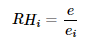
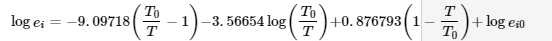

In [21]:
 def relative_humidity_to_ice(t, rh):
    if rh == -9999:
        return -9999
    elif rh == -8888:
        return -8888
    else:
        rh_std = rh / 100 # Standardizing to have rh presented in precent to hundreths
        to = 273.16 #ice-point (triple point) temperature
        e_i0 = 6.1173 #ice-point pressure

        #ei is saturated water vapor pressure over ice
        log_ei = -9.09718 * (to / t - 1) - 3.56654 * math.log(to / t) + 0.876793 * (1 - t / to) + math.log(e_i0)
        ei = math.exp(log_ei)

        #e is Actual Water Vapor Pressure. This is calculated by multiplying 
        #relative humidity by saturated vapor pressure over ice.
        e = rh_std * ei 

        #returning relative humidity to ice
        return e / ei
        

### Pressure to Pressure Altitude

In [22]:
def calculate_pressure_altitude(pressure):
    if pressure == -9999:
        return -9999    
    pressure /= 100

    pressure_altitude = (1 - (pressure / 1013.25) ** 0.190284) * 145366.45
    return round(pressure_altitude, 2)

### Capture When Temp below -42 Fahrenheit, RH above 100%, and pressure altitude below 43,000 feet

In [23]:
def issr(temp_f, rhi, press_alt):
    if temp_f < -42 and rhi > 1 and press_alt < 43000:
        return "yes"
    else:
        return "no"

## Adding Conversions to DataFrames

### Filter to 2010-2024

In [24]:
#Filtering dataset to 2000-2024 data due to both datasets containing millions of rows
upton_df2 = upton_df[(upton_df['year'] >= 2010) & (upton_df['year'] <= 2024)]

### Adding Conversions to Upton DataFrame

In [25]:
#Fahrenheit
fahrenheit = []

for line in upton_df2['temp']:
    fahrenheit.append(temp_to_fahrenheit(line))

upton_df2['temp_f'] = fahrenheit

#Kelvins
kelvin = []
for line in upton_df2['temp']:
    kelvin.append(temp_to_kelvin(line))

upton_df2['temp_k'] = kelvin

#Relative Humidity to Ice
rhi = []
for index, row in upton_df2.iterrows():
    temp_k = row['temp_k']
    rh = row['rh']
    rhi.append(relative_humidity_to_ice(temp_k, rh))

upton_df2['rhi'] = rhi

#Pressure Altitude
press_alt = []

for line in upton_df2['press']:
    press_alt.append(calculate_pressure_altitude(line))

upton_df2['press_alt'] = press_alt


#ISS Conditions
issc = []
for index, row in upton_df2.iterrows():
    temp_f = row['temp_f']
    rhi = row['rhi']
    press_alt = row['press_alt']
    issc.append(issr(temp_f, rhi, press_alt))

upton_df2['issc'] = issc

C:\Users\Nicholas Weber\AppData\Local\Temp\ipykernel_12736\209529862.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  upton_df2['temp_f'] = fahrenheit
C:\Users\Nicholas Weber\AppData\Local\Temp\ipykernel_12736\209529862.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  upton_df2['temp_k'] = kelvin
C:\Users\Nicholas Weber\AppData\Local\Temp\ipykernel_12736\209529862.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer]

In [26]:
upton_df2

,id_,year,month,day,hour,reltime,numlev,p_src,np_src,lat,...,tflag,rh,dpdp,wdir,wspd,temp_f,temp_k,rhi,press_alt,issc
1800607,#USM00072501,2010,1,1,0,2329,190,ncdc6301,ncdc6301,408650,...,B,890,16,0,0,32.18,273.25,8.90,-75.81,no
1800608,#USM00072501,2010,1,1,0,2329,190,ncdc6301,ncdc6301,408650,...,B,888,16,45,18,32.00,273.15,8.88,-53.46,no
1800609,#USM00072501,2010,1,1,0,2329,190,ncdc6301,ncdc6301,408650,...,B,871,19,47,36,31.64,272.95,8.71,134.03,no
1800610,#USM00072501,2010,1,1,0,2329,190,ncdc6301,ncdc6301,408650,...,B,970,4,44,49,31.10,272.65,9.70,363.64,no
1800611,#USM00072501,2010,1,1,0,2329,190,ncdc6301,ncdc6301,408650,...,B,998,0,38,42,30.74,272.45,9.98,643.75,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3677381,#USM00072501,2024,2,15,12,1107,128,ncdc-nws,,408650,...,A,31,238,271,300,-68.26,217.45,0.31,87687.94,no
3677382,#USM00072501,2024,2,15,12,1107,128,ncdc-nws,,408650,...,A,31,239,270,277,-67.18,218.05,0.31,87842.21,no
3677383,#USM00072501,2024,2,15,12,1107,128,ncdc-nws,,408650,...,A,32,238,263,286,-66.64,218.35,0.32,88026.84,no
3677384,#USM00072501,2024,2,15,12,1107,128,ncdc-nws,,408650,...,A,34,232,254,377,-67.90,217.65,0.34,88959.45,no


In [39]:
upton_df2[(upton_df2['issc'] == 'yes') & (upton_df2['year'] == 2023)]

,id_,year,month,day,hour,reltime,numlev,p_src,np_src,lat,...,tflag,rh,dpdp,wdir,wspd,temp_f,temp_k,rhi,press_alt,issc
3536388,#USM00072501,2023,1,1,12,1106,144,ncdc-nws,ncdc-gts,408650,...,B,373,82,266,493,-44.68,230.55,3.73,27989.77,yes
3536389,#USM00072501,2023,1,1,12,1106,144,ncdc-nws,ncdc-gts,408650,...,B,367,83,266,493,-44.86,230.45,3.67,28050.88,yes
3536390,#USM00072501,2023,1,1,12,1106,144,ncdc-nws,ncdc-gts,408650,...,B,181,136,256,420,-50.08,227.55,1.81,29820.42,yes
3536391,#USM00072501,2023,1,1,12,1106,144,ncdc-nws,ncdc-gts,408650,...,B,184,134,255,425,-50.80,227.15,1.84,30052.74,yes
3536392,#USM00072501,2023,1,1,12,1106,144,ncdc-nws,ncdc-gts,408650,...,B,185,131,256,427,-53.68,225.55,1.85,30828.83,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3659113,#USM00072501,2023,12,31,12,1108,216,ncdc-nws,ncdc-gts,408650,...,B,160,135,271,209,-64.66,219.45,1.60,37157.88,yes
3659114,#USM00072501,2023,12,31,12,1108,216,ncdc-nws,ncdc-gts,408650,...,B,141,145,270,159,-61.78,221.05,1.41,37987.15,yes
3659115,#USM00072501,2023,12,31,12,1108,216,ncdc-nws,ncdc-gts,408650,...,B,141,145,268,161,-61.78,221.05,1.41,38052.62,yes
3659116,#USM00072501,2023,12,31,12,1108,216,ncdc-nws,ncdc-gts,408650,...,B,126,153,252,164,-61.78,221.05,1.26,38615.05,yes


### Filter to 2010-2024

In [27]:
#Filtering dataset to 2000-2024 data due to both datasets containing millions of rows
albany_df2 = albany_df[(albany_df['year'] >= 2010) & (albany_df['year'] <= 2024)]

### Adding Conversions to Albany DataFrame

In [28]:
#Temp
albany_fahrenheit = []

for line in albany_df2['temp']:
    albany_fahrenheit.append(temp_to_fahrenheit(line))

albany_df2['temp_f'] = albany_fahrenheit

#Kelvins
albany_kelvin = []
for line in albany_df2['temp']:
    albany_kelvin.append(temp_to_kelvin(line))

albany_df2['temp_k'] = albany_kelvin

#Relative Humidity to Ice
albany_rhi = []
for index, row in albany_df2.iterrows():
    albany_temp_k = row['temp_k']
    albany_rh = row['rh']
    albany_rhi.append(relative_humidity_to_ice(albany_temp_k, albany_rh))

albany_df2['rhi'] = albany_rhi

#Pressure Altitude
albany_press_alt = []

for line in albany_df2['press']:
    albany_press_alt.append(calculate_pressure_altitude(line))

albany_df2['press_alt'] = albany_press_alt

#ISS Conditions
albany_issc = []
for index, row in albany_df2.iterrows():
    albany_temp_f = row['temp_f']
    albany_rhi = row['rhi']
    albany_press_alt = row['press_alt']
    albany_issc.append(issr(albany_temp_f, albany_rhi, albany_press_alt))

albany_df2['issc'] = albany_issc

C:\Users\Nicholas Weber\AppData\Local\Temp\ipykernel_12736\3719306899.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  albany_df2['temp_f'] = albany_fahrenheit
C:\Users\Nicholas Weber\AppData\Local\Temp\ipykernel_12736\3719306899.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  albany_df2['temp_k'] = albany_kelvin
C:\Users\Nicholas Weber\AppData\Local\Temp\ipykernel_12736\3719306899.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

In [29]:
albany_df2

,id_,year,month,day,hour,reltime,numlev,p_src,np_src,lat,...,tflag,rh,dpdp,wdir,wspd,temp_f,temp_k,rhi,press_alt,issc
3039799,#USM00072518,2010,1,1,0,0,146,ncdc6301,ncdc6301,426919,...,B,890,16,160,15,29.12,271.55,8.90,193.00,no
3039800,#USM00072518,2010,1,1,0,0,146,ncdc6301,ncdc6301,426919,...,B,903,14,165,21,27.86,270.85,9.03,363.64,no
3039801,#USM00072518,2010,1,1,0,0,146,ncdc6301,ncdc6301,426919,...,B,940,8,182,51,24.98,269.25,9.40,1547.57,no
3039802,#USM00072518,2010,1,1,0,0,146,ncdc6301,ncdc6301,426919,...,B,963,5,204,41,30.74,272.45,9.63,2152.09,no
3039803,#USM00072518,2010,1,1,0,0,146,ncdc6301,ncdc6301,426919,...,B,926,11,211,39,29.48,271.75,9.26,2498.86,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4743858,#USM00072518,2024,2,15,12,1107,249,ncdc-nws,,426919,...,B,43,211,271,136,-74.02,214.25,0.43,84075.32,no
4743859,#USM00072518,2024,2,15,12,1107,249,ncdc-nws,,426919,...,B,48,203,284,172,-76.00,213.15,0.48,84612.93,no
4743860,#USM00072518,2024,2,15,12,1107,249,ncdc-nws,,426919,...,B,47,204,285,195,-76.90,212.65,0.47,84883.82,no
4743861,#USM00072518,2024,2,15,12,1107,249,ncdc-nws,,426919,...,B,45,206,283,204,-77.08,212.55,0.45,84998.23,no


In [30]:
albany_df2[albany_df2['issc'] == 'yes']

,id_,year,month,day,hour,reltime,numlev,p_src,np_src,lat,...,tflag,rh,dpdp,wdir,wspd,temp_f,temp_k,rhi,press_alt,issc
3039812,#USM00072518,2010,1,1,0,0,146,ncdc6301,ncdc6301,426919,...,B,534,52,255,385,-56.02,224.25,5.34,28913.28,yes
3039813,#USM00072518,2010,1,1,0,0,146,ncdc6301,ncdc6301,426919,...,B,410,71,255,404,-61.06,221.45,4.10,30052.74,yes
3040256,#USM00072518,2010,1,2,12,1202,153,ncdc6301,ncdc6301,426919,...,B,526,55,163,136,-50.44,227.35,5.26,23564.35,yes
3040257,#USM00072518,2010,1,2,12,1202,153,ncdc6301,ncdc6301,426919,...,B,541,52,163,134,-54.40,225.15,5.41,24590.18,yes
3040258,#USM00072518,2010,1,2,12,1202,153,ncdc6301,ncdc6301,426919,...,B,366,84,175,113,-53.86,225.45,3.66,25562.33,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4743723,#USM00072518,2024,2,15,12,1107,249,ncdc-nws,,426919,...,B,145,142,305,370,-63.22,220.25,1.45,38666.90,yes
4743724,#USM00072518,2024,2,15,12,1107,249,ncdc-nws,,426919,...,B,125,154,298,326,-61.60,221.15,1.25,39233.02,yes
4743725,#USM00072518,2024,2,15,12,1107,249,ncdc-nws,,426919,...,B,123,155,297,339,-60.70,221.65,1.23,39388.62,yes
4743726,#USM00072518,2024,2,15,12,1107,249,ncdc-nws,,426919,...,B,123,156,297,346,-60.52,221.75,1.23,39472.57,yes


## Filter Dataset (Data from 2023 AND Pressure Altitude Under 43,000)

In [40]:
#Filter and create new DataFrame. New U.S. DataFrame is all data that is in the year 2023 and 
#pressure altitude is under 4,300 ft.
new_upton_df = upton_df2[(upton_df2['year'] == 2023) & (upton_df2['press_alt'] <= 43000)]

In [41]:
#Filter and create new DataFrame. New Canada DataFrame is all data that is in the year 2023 and 
#pressure altitude is under 4,300 ft.
new_albany_df = albany_df2[(albany_df2['year'] == 2023) & (albany_df2['press_alt'] <= 43000)]

## Finalized Cleaned Datasets for Analysis

In [42]:
new_upton_df

,id_,year,month,day,hour,reltime,numlev,p_src,np_src,lat,...,tflag,rh,dpdp,wdir,wspd,temp_f,temp_k,rhi,press_alt,issc
3536356,#USM00072501,2023,1,1,12,1106,144,ncdc-nws,ncdc-gts,408650,...,B,1000,0,360,0,49.28,282.75,10.00,204.26,no
3536357,#USM00072501,2023,1,1,12,1106,144,ncdc-nws,ncdc-gts,408650,...,B,937,10,279,74,50.72,283.55,9.37,363.37,no
3536358,#USM00072501,2023,1,1,12,1106,144,ncdc-nws,ncdc-gts,408650,...,B,872,20,273,106,51.62,284.05,8.72,564.00,no
3536359,#USM00072501,2023,1,1,12,1106,144,ncdc-nws,ncdc-gts,408650,...,B,818,30,283,130,51.80,284.15,8.18,863.67,no
3536360,#USM00072501,2023,1,1,12,1106,144,ncdc-nws,ncdc-gts,408650,...,B,772,38,289,142,51.26,283.85,7.72,1131.57,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3659269,#USM00072501,2023,12,31,12,1108,216,ncdc-nws,ncdc-gts,408650,...,,-9999,9999,15,87,-9999.00,-9999.00,-9999.00,-9999.00,no
3659270,#USM00072501,2023,12,31,12,1108,216,ncdc-nws,ncdc-gts,408650,...,,-9999,9999,15,72,-9999.00,-9999.00,-9999.00,-9999.00,no
3659271,#USM00072501,2023,12,31,12,1108,216,ncdc-nws,ncdc-gts,408650,...,,-9999,9999,30,159,-9999.00,-9999.00,-9999.00,-9999.00,no
3659272,#USM00072501,2023,12,31,12,1108,216,ncdc-nws,ncdc-gts,408650,...,,-9999,9999,10,62,-9999.00,-9999.00,-9999.00,-9999.00,no


In [44]:
new_albany_df

,id_,year,month,day,hour,reltime,numlev,p_src,np_src,lat,...,tflag,rh,dpdp,wdir,wspd,temp_f,temp_k,rhi,press_alt,issc
4680624,#USM00072518,2023,1,5,18,1631,33,ncdc-gts,,426919,...,A,-9999,38,180,21,43.88,279.75,-9999.0,225.96,no
4680625,#USM00072518,2023,1,5,18,1631,33,ncdc-gts,,426919,...,A,-9999,18,155,31,45.32,280.55,-9999.0,363.64,no
4680626,#USM00072518,2023,1,5,18,1631,33,ncdc-gts,,426919,...,A,-9999,6,155,15,38.84,276.95,-9999.0,2498.86,no
4680627,#USM00072518,2023,1,5,18,1631,33,ncdc-gts,,426919,...,,-9999,9999,200,51,-9999.00,-9999.00,-9999.0,3726.06,no
4680628,#USM00072518,2023,1,5,18,1631,33,ncdc-gts,,426919,...,A,-9999,11,235,67,31.46,272.85,-9999.0,4779.19,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4716617,#USM00072518,2023,12,31,12,1109,231,ncdc-nws,ncdc-gts,426919,...,,-9999,9999,10,77,-9999.00,-9999.00,-9999.0,-9999.00,no
4716618,#USM00072518,2023,12,31,12,1109,231,ncdc-nws,ncdc-gts,426919,...,,-9999,9999,360,82,-9999.00,-9999.00,-9999.0,-9999.00,no
4716619,#USM00072518,2023,12,31,12,1109,231,ncdc-nws,ncdc-gts,426919,...,,-9999,9999,10,118,-9999.00,-9999.00,-9999.0,-9999.00,no
4716620,#USM00072518,2023,12,31,12,1109,231,ncdc-nws,ncdc-gts,426919,...,,-9999,9999,5,87,-9999.00,-9999.00,-9999.0,-9999.00,no


## ISS Conditions Exploratory Data Analysis

<Axes: xlabel='issc', ylabel='count'>

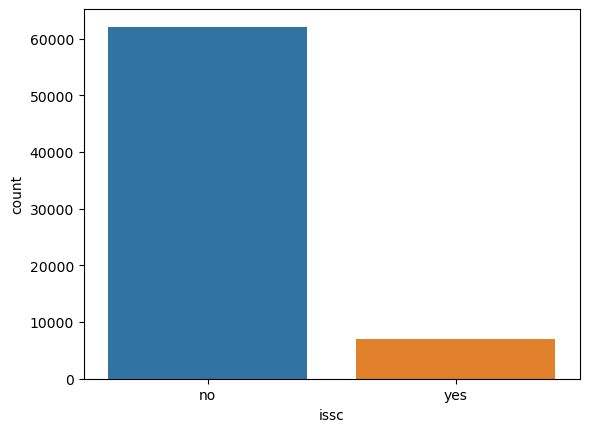

In [45]:
sns.countplot(x = 'issc', data = new_upton_df)

### ISS Conditions were present in the region X% of days

In [88]:
#This the question I had. Does ISSC happen everyday but for short periods of time? January 5th for
#example shows ISSC occuring in 11 rows and does not appear in 87 rows.

new_upton_df[(new_upton_df['month'] == 1) & (new_upton_df['day'] == 5) & (new_upton_df['issc'] == 'yes')]

,id_,year,month,day,hour,reltime,numlev,p_src,np_src,lat,...,tflag,rh,dpdp,wdir,wspd,temp_f,temp_k,rhi,press_alt,issc
3536965,#USM00072501,2023,1,5,12,1105,154,ncdc-nws,ncdc-gts,408650,...,B,472,64,231,680,-42.88,231.55,4.72,30972.99,yes
3536966,#USM00072501,2023,1,5,12,1105,154,ncdc-nws,ncdc-gts,408650,...,B,374,82,231,677,-45.04,230.35,3.74,31378.64,yes
3536967,#USM00072501,2023,1,5,12,1105,154,ncdc-nws,ncdc-gts,408650,...,B,429,70,231,685,-48.46,228.45,4.29,32024.85,yes
3536968,#USM00072501,2023,1,5,12,1105,154,ncdc-nws,ncdc-gts,408650,...,B,486,57,234,675,-57.64,223.35,4.86,33984.70,yes
3536969,#USM00072501,2023,1,5,12,1105,154,ncdc-nws,ncdc-gts,408650,...,B,564,43,230,682,-68.98,217.05,5.64,36421.77,yes
3536970,#USM00072501,2023,1,5,12,1105,154,ncdc-nws,ncdc-gts,408650,...,B,645,32,231,679,-76.36,212.95,6.45,37885.33,yes
3536971,#USM00072501,2023,1,5,12,1105,154,ncdc-nws,ncdc-gts,408650,...,B,549,43,231,674,-78.16,211.95,5.49,38423.82,yes
3536972,#USM00072501,2023,1,5,12,1105,154,ncdc-nws,ncdc-gts,408650,...,B,520,47,232,670,-78.34,211.85,5.20,38615.05,yes
3536973,#USM00072501,2023,1,5,12,1105,154,ncdc-nws,ncdc-gts,408650,...,B,472,54,237,663,-76.72,212.75,4.72,39189.33,yes
3536974,#USM00072501,2023,1,5,12,1105,154,ncdc-nws,ncdc-gts,408650,...,B,416,62,238,677,-78.34,211.85,4.16,40145.92,yes


In [85]:
new_upton_df[(new_upton_df['month'] == 1) & (new_upton_df['day'] == 1) & (new_upton_df['issc'] == 'no')]

,id_,year,month,day,hour,reltime,numlev,p_src,np_src,lat,...,tflag,rh,dpdp,wdir,wspd,temp_f,temp_k,rhi,press_alt,issc
3536356,#USM00072501,2023,1,1,12,1106,144,ncdc-nws,ncdc-gts,408650,...,B,1000,0,360,0,49.28,282.75,10.00,204.26,no
3536357,#USM00072501,2023,1,1,12,1106,144,ncdc-nws,ncdc-gts,408650,...,B,937,10,279,74,50.72,283.55,9.37,363.37,no
3536358,#USM00072501,2023,1,1,12,1106,144,ncdc-nws,ncdc-gts,408650,...,B,872,20,273,106,51.62,284.05,8.72,564.00,no
3536359,#USM00072501,2023,1,1,12,1106,144,ncdc-nws,ncdc-gts,408650,...,B,818,30,283,130,51.80,284.15,8.18,863.67,no
3536360,#USM00072501,2023,1,1,12,1106,144,ncdc-nws,ncdc-gts,408650,...,B,772,38,289,142,51.26,283.85,7.72,1131.57,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3536495,#USM00072501,2023,1,1,12,1106,144,ncdc-nws,ncdc-gts,408650,...,,-9999,9999,285,273,-9999.00,-9999.00,-9999.00,-9999.00,no
3536496,#USM00072501,2023,1,1,12,1106,144,ncdc-nws,ncdc-gts,408650,...,,-9999,9999,290,309,-9999.00,-9999.00,-9999.00,-9999.00,no
3536497,#USM00072501,2023,1,1,12,1106,144,ncdc-nws,ncdc-gts,408650,...,,-9999,9999,280,273,-9999.00,-9999.00,-9999.00,-9999.00,no
3536498,#USM00072501,2023,1,1,12,1106,144,ncdc-nws,ncdc-gts,408650,...,,-9999,9999,265,345,-9999.00,-9999.00,-9999.00,-9999.00,no
